<h1>Analyse statistique des Salaires </h1>

Le dataset contient des informations sur les employés municipaux, incluant leurs salaires, heures supplémentaires, avantages, département, métier, et autres détails liés à leur emploi sur plusieurs années.
: 
<a href='https://www.kaggle.com/datasets/siddheshera/san-francisco-employee-salary-compensationhttps://www.kaggle.com/datasets/siddheshera/san-francisco-employee-salary-compensation'>www.kaggle.com/datasets/siddheshera/san-francisco-employee-salary-compensation</a>
<h2>Objectif de l'étude</h2>
<p>Cette analyse a pour objectif de comprendre les disparités salariales et l'impact des heures supplémentaires sur les salaires des employés de la ville de San Francisco.</p>

<h2>Technologies et Méthodes Utilisées</h2>
<ul>
    <li><strong>Technologies utilisées :</strong>
        <ul>
            <li><strong>Python</strong>, avec les bibliothèques <strong>Pandas</strong>, <strong>NumPy</strong>, <strong>Matplotlib</strong> et <strong>Scikit-learn</strong> pour la manipulation des données, l'analyse et la visualisation.</li>
            <li><strong>Jupyter Notebook</strong> pour une analyse interactive et une présentation claire.</li>
            <li><strong>Scipy</strong>, pour réaliser des tests statistiques.</li>
        </ul>
    </li>
    <li><strong>Tests Statistiques :</strong>
        <ul>
            <li>Test de Kruskal-Wallis : Ce test a été utilisé pour vérifier s'il existe des différences significatives dans la disparité de salaires entre départements, années, etc.</li>
        </ul>
    </li>
</ul>

<h2>Approche de l'Analyse</h2>
<p>Nous avons entrepris une analyse des salaires et des heures supplémentaires des employés, en nous concentrant sur les variations salariales au fil des années, les différences entre les départements et métiers, ainsi que l'impact des heures supplémentaires sur les revenus.</p>

<h2>Les Principaux Objectifs de l'Étude</h2>
<ul>
    <li>Analyser l’évolution des salaires et des avantages de 2013 à 2020.</li>
    <li>Comparer les salaires selon les départements et métiers.</li>
    <li>Examiner l'impact des heures supplémentaires sur les salaires des employés.</li>
    <li>Segmenter les employés pour identifier des profils types en fonction des salaires et avantages.</li>
</ul>

<h2>Importation des bibliotheques</h2>

In [3]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

<h2>1 - Exploration des donnees</h2>

<h3>Chargement et prétraitement </h3>

In [6]:
df = pd.read_csv('Employee_Salary_Compensation.csv')  
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


#### Vérification des valeurs manquantes et nettoyage des données

In [8]:
df.shape

(678524, 22)

In [9]:
print(df.isnull().sum())   

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 179
Union                      179
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64


In [10]:
df.dropna(inplace=True)  # Supprimer les lignes avec valeurs manquantes
print(df.isnull().sum())

Organization Group Code    0
Job Family Code            0
Job Code                   0
Year Type                  0
Year                       0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family                 0
Job                        0
Employee Identifier        0
Salaries                   0
Overtime                   0
Other Salaries             0
Total Salary               0
Retirement                 0
Health and Dental          0
Other Benefits             0
Total Benefits             0
Total Compensation         0
dtype: int64


#### verifier les doublons

In [12]:
df.duplicated().sum()

0

#### verifications des types de donnees

In [14]:
df.dtypes

Organization Group Code      int64
Job Family Code             object
Job Code                    object
Year Type                   object
Year                         int64
Organization Group          object
Department Code             object
Department                  object
Union Code                 float64
Union                       object
Job Family                  object
Job                         object
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

<h4>dans la description de lauteur du dataset :
</br></br>
nous avons des salaire et dautres donnes negatives qui représentent des ajustements salariaux, souvent liés à des erreurs de paiement. Par exemple, un trop-payé en 2013 peut être corrigé par un ajustement négatif en 2014.
</br></br>
Nous allons donc les exclure pour analyser les salaires réellement versés (hors ajustements)
</h4>

In [16]:
df = df[(df[['Salaries', 'Total Salary', 'Overtime', 'Other Salaries', 'Retirement', 
                      'Health and Dental', 'Other Benefits', 'Total Benefits', 'Total Compensation']] >= 0).all(axis=1)]
df = df[df['Salaries']>0]

<h3>Analyse exploratoire </h3>

<h4>Statistiques descriptives : 
</h4>

In [19]:
df.describe()

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,665919.000000,665919.000000,665919.000000,6.659190e+05,665919.00000,665919.000000,665919.000000,665919.000000,665919.000000,665919.000000,665919.000000,665919.000000,665919.000000
mean,2.980026,2016.533307,492.691410,1.978221e+07,71920.94852,5694.637211,3853.039936,81262.487750,14334.720316,10295.298928,5189.016466,29819.035710,111081.523460
std,1.581043,2.267746,330.726766,1.972046e+07,47673.26898,13428.230079,8445.795209,55769.973412,10308.581258,5747.840050,3720.792908,17947.423498,72326.656242
min,1.000000,2013.000000,1.000000,0.000000e+00,0.10000,0.000000,0.000000,0.110000,0.000000,0.000000,0.000000,0.000000,0.120000
25%,2.000000,2015.000000,250.000000,2.866500e+04,33959.00000,0.000000,0.000000,37167.495000,5865.065000,5548.900000,2073.430000,14211.095000,52065.550000
50%,2.000000,2017.000000,535.000000,3.664595e+07,69915.08000,0.000000,742.390000,77174.540000,14439.120000,12548.280000,5057.340000,33408.530000,110777.670000
75%,4.000000,2019.000000,790.000000,3.767720e+07,102737.24500,4633.820000,4432.530000,115149.045000,20775.080000,14433.940000,7680.270000,41742.565000,157807.345000
max,7.000000,2020.000000,990.000000,4.609664e+07,651936.71000,321523.310000,568163.120000,658867.570000,128694.620000,59405.230000,35691.040000,166068.180000,807625.250000


<h4>creation de groupes(bins) pour les salaires</h4>

In [21]:
bins = [0,35000,70000,100000,df['Salaries'].max()]
names = ['faible','moyen','élevé','tres élevé']
df['Salaries bins'] = pd.cut(df['Salaries'],bins,labels=names)
df['Salaries bins'].unique()

['moyen', 'faible', 'tres élevé', 'élevé']
Categories (4, object): ['faible' < 'moyen' < 'élevé' < 'tres élevé']

<h4>Histogrammes et boxplots pour comprendre la distribution des variables : 
 </h4>

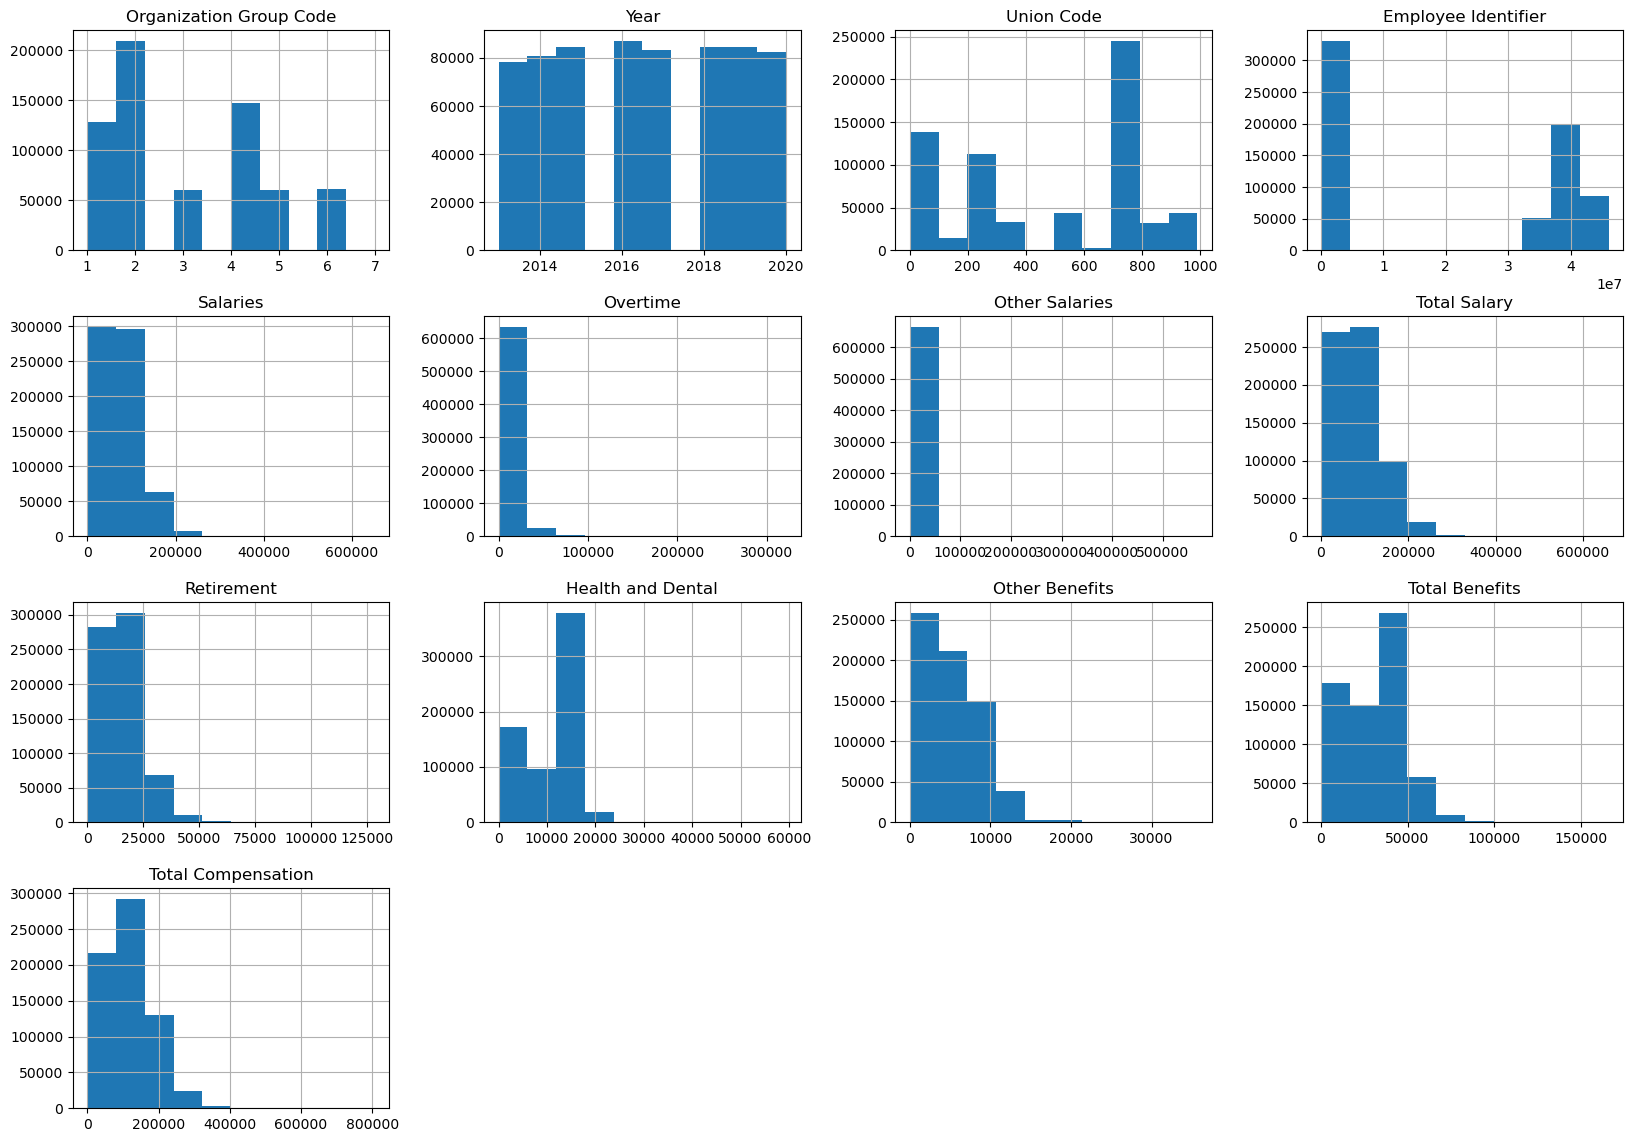

In [23]:
df.hist(figsize=(20, 14)) 
plt.show()

<h4>Corrélation entre variables : </h4>

In [25]:
df_stat=df.select_dtypes(include=['number','datetime64[ns]'])
df_stat.columns

Index(['Organization Group Code', 'Year', 'Union Code', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Benefits',
       'Total Compensation'],
      dtype='object')

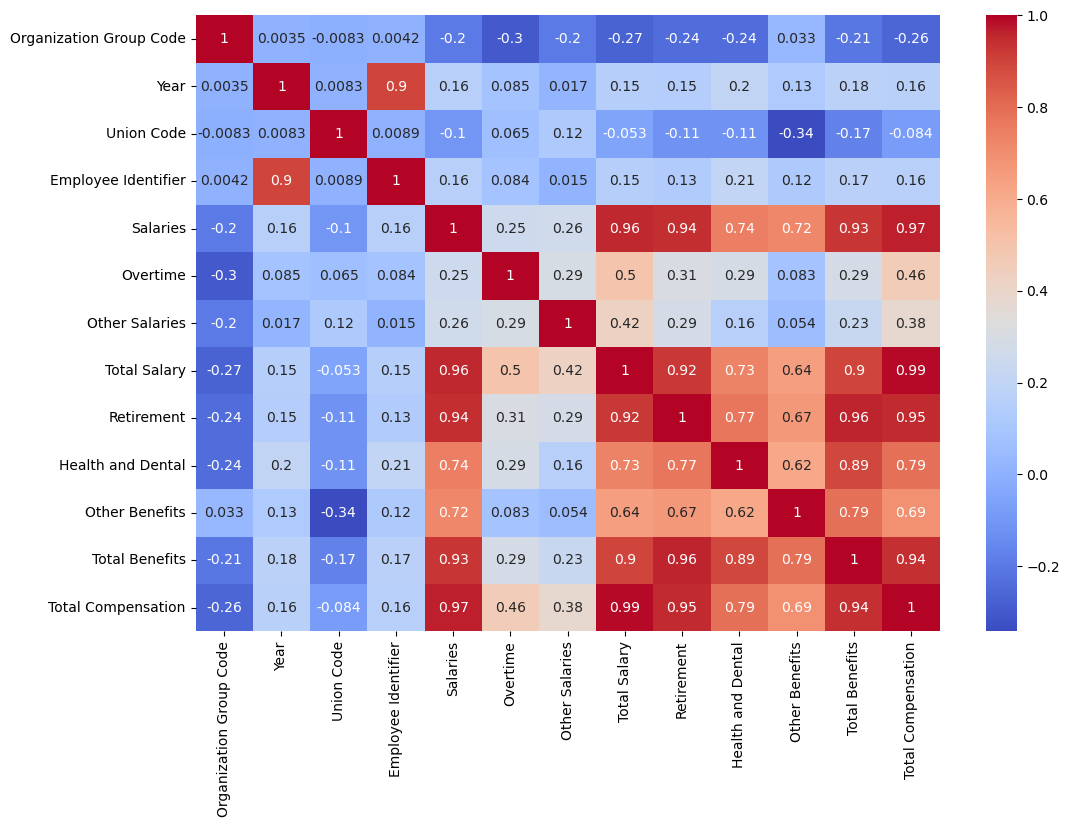

In [26]:
plt.figure(figsize=(12, 8))  
sns.heatmap(df_stat.corr(), annot=True, cmap='coolwarm') 
plt.show() 

<h5>Le Q-Q Plot (Quantile-Quantile Plot) sert à vérifier si une distribution suit une loi normale</h5>

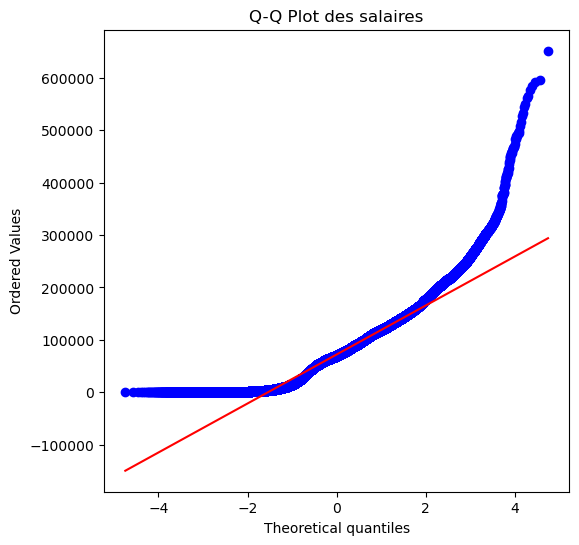

In [28]:
import scipy.stats as stats
plt.figure(figsize=(6, 6))
stats.probplot(df['Salaries'], dist="norm", plot=plt)
plt.title("Q-Q Plot des salaires")
plt.show()

Vue que les points s’écartent, la distribution n’est pas normale

<h2>2 - Analyse des Tendances Salariales</h2>

<p>Dans cette étape, on va examiner l’évolution des salaires et comparer les différences entre métiers et départements.</p>
<h5>hypothese : le salaire évolue au fil du temps</h5>

<h3>a - Analyse Temporelle des Salaires</h3>

In [32]:
# la moyenne des salaires par annee
revenu_moyen_par_annee = df.groupby('Year')['Salaries'].mean()
print('revenu moyen par annee ',revenu_moyen_par_annee)

# la medianne des salaire
revenu_median_par_annee = df.groupby('Year')['Salaries'].median()
print('\n revenu median par annee ',revenu_median_par_annee)

revenu moyen par annee  Year
2013    64728.475409
2014    63069.726787
2015    63838.040054
2016    66623.552025
2017    74202.931534
2018    77007.345465
2019    80255.994495
2020    85250.487612
Name: Salaries, dtype: float64

 revenu median par annee  Year
2013    63855.01
2014    62151.10
2015    62795.54
2016    65383.90
2017    72978.80
2018    75632.76
2019    78223.69
2020    81955.90
Name: Salaries, dtype: float64


<h5>distribution des salaires par annee</h5>

In [34]:
np.std(revenu_moyen_par_annee)

7918.972353839752

[Text(0.5, 1.0, 'distribution des salaires par annee')]

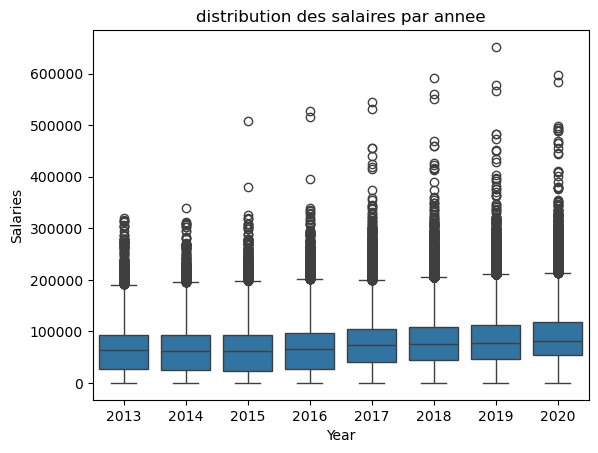

In [35]:
box_plot_salaries = sns.boxplot(x='Year',y='Salaries',data=df)
box_plot_salaries.set(title='distribution des salaires par annee',)

evolution du salaire et des avantages :
<ul>
    <li>Retirement</li>
    <li>Health and Dental</li>
    <li>Other Benefits</li>
</ul>

In [37]:
df_Retirement = df.groupby('Year')['Retirement'].mean()
df_Health_and_Dental = df.groupby('Year')['Health and Dental'].mean()
df_Other_Benefits = df.groupby('Year')['Other Benefits'].mean()

In [38]:
print('Retirement',df_Retirement)
print('\n\n Health_and_Dental',df_Health_and_Dental)
print('\n\n Other_Benefits',df_Other_Benefits)

Retirement Year
2013    12373.681866
2014    13627.187939
2015    13774.477954
2016    12414.750418
2017    13653.002199
2018    14723.823503
2019    15739.421461
2020    18341.499249
Name: Retirement, dtype: float64


 Health_and_Dental Year
2013     9248.727222
2014     9063.952799
2015     8752.714815
2016     9478.016547
2017    10817.488068
2018    11143.157610
2019    11539.835147
2020    12269.680809
Name: Health and Dental, dtype: float64


 Other_Benefits Year
2013    4612.779554
2014    4614.524226
2015    4770.852289
2016    5012.262137
2017    5257.554781
2018    5477.715106
2019    5726.588304
2020    5998.384506
Name: Other Benefits, dtype: float64


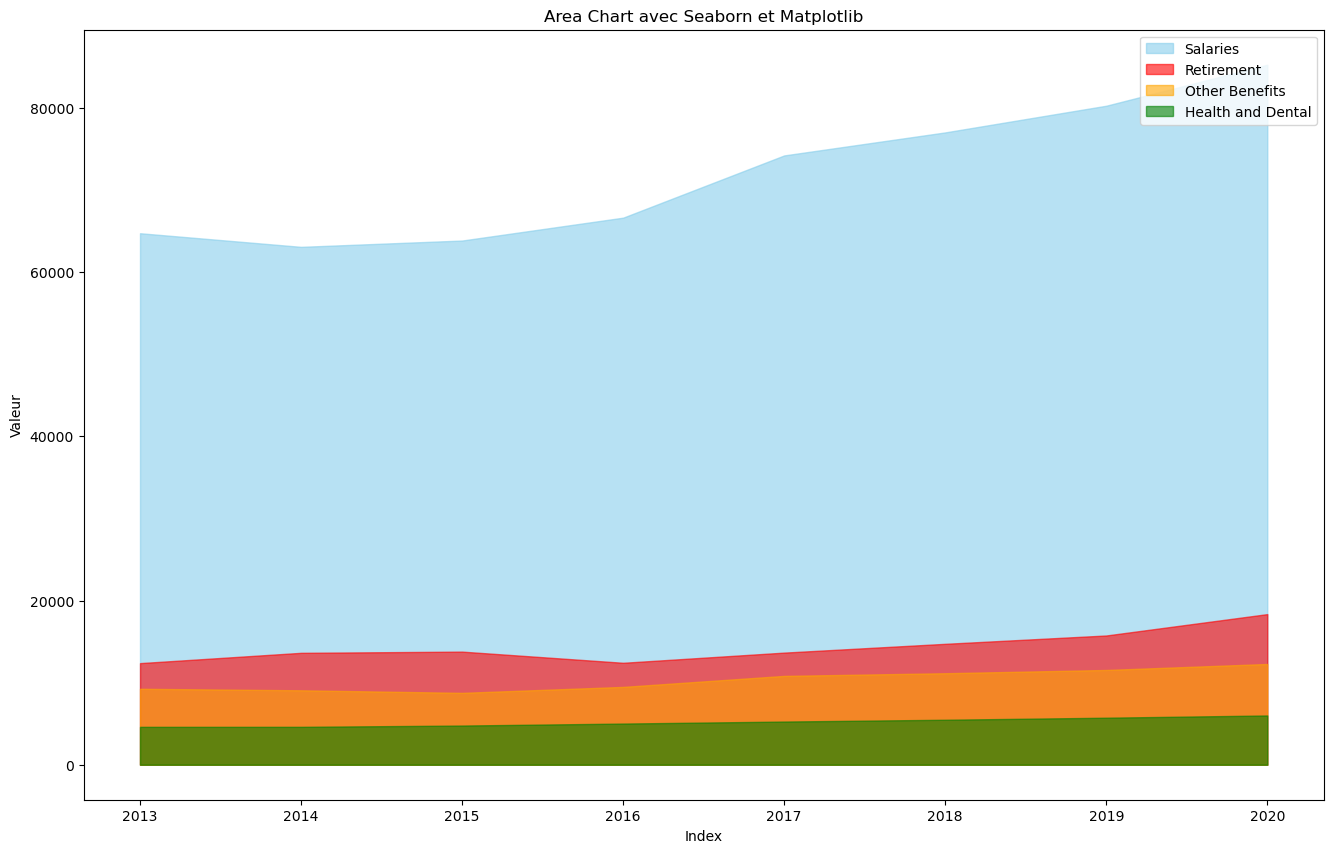

In [39]:
plt.figure(figsize=(16,10))
# Tracer un graphique en aires
plt.fill_between(revenu_moyen_par_annee.index,revenu_moyen_par_annee, color='skyblue', alpha=0.6, label='Salaries')
plt.fill_between(df_Retirement.index,df_Retirement,color='red', alpha=0.6, label='Retirement')
plt.fill_between(df_Health_and_Dental.index,df_Health_and_Dental, color='orange', alpha=0.6, label='Other Benefits')
plt.fill_between(df_Other_Benefits.index,df_Other_Benefits, color='green', alpha=0.6, label='Health and Dental')

# Ajouter des labels et un titre
plt.xlabel('Index')
plt.ylabel('Valeur')
plt.title('Area Chart avec Seaborn et Matplotlib')
plt.legend()

# Afficher le graphique
plt.show()

Entre 2013 et 2020, nous constatons :

<ul> 
    <li><strong>Hausse des salaires :</strong> +31.7% (64,728 → 85,250).</li>
    <li><strong>Augmentation des contributions à la retraite :</strong> +48.2% (12,374 → 18,341).</li>
    <li><strong>Santé & dentaire :</strong> +32.6% (9,249 → 12,270).</li> 
    <li><strong>Autres avantages :</strong> +30.0% (4,613 → 5,998).</li> 
</ul>

Accélération notable après 2016, surtout en 2020, avec une augmentation de 4,995 sur le salaire moyen.
<ul>
    <li>Les salaires et les avantages ont tous augmenté de manière significative, surtout après 2016.</li>
    <li>La contribution retraite croît plus vite (+48%) que le salaire (+31.7%), ce qui pourrait indiquer une politique d’augmentation des cotisations.</li>
    <li>Hausse cohérente des avantages sociaux (santé et autres bénéfices), ce qui reflète un meilleur package global pour les employés.</li>
</ul>

<strong>Hypothese possible :</strong>
<li>Cette hausse est peut etre due à une inflation générale ou à des réformes internes </li>
<li>Le pic en 2020 est peut etre lié à des ajustements spécifiques (COVID, primes, manque de personnel) ?</li>


<h4>Nous allons effectuer tes test statistique pour verifier motre conclusion</h4>

<h5>Test de comparaison de moyennes : Kruskal-Wallis</h5>

Le test de Kruskal-Wallis est un test non paramétrique pour comparer plus de deux groupes indépendants sur une variable continue, lorsque les données ne suivent pas une distribution normale.

Vue Que nous un tres grand volume de donnees nous travaillerons avec un echantillons basse sur les annees

In [45]:
df_echantillon_year=df.groupby("Year").sample(frac=0.01, random_state=1)
df_echantillon_year.describe()

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,6661.000000,6661.000000,6661.000000,6.661000e+03,6661.000000,6661.000000,6661.000000,6661.000000,6661.000000,6661.000000,6661.000000,6661.000000,6661.000000
mean,2.971326,2016.533403,489.849722,1.977281e+07,71843.470950,5712.201404,3980.900872,81320.931968,14292.326232,10254.201518,5191.730314,29738.258063,111059.190032
std,1.578455,2.267998,333.206596,1.971643e+07,47312.082595,13235.093105,8642.523221,55526.500719,10286.270747,5765.341407,3741.451306,17898.948926,71967.870242
min,1.000000,2013.000000,1.000000,0.000000e+00,12.920000,0.000000,0.000000,13.300000,0.000000,0.000000,0.000000,0.040000,13.340000
25%,2.000000,2015.000000,216.000000,2.860600e+04,34863.710000,0.000000,0.000000,37410.550000,5771.930000,5472.200000,2081.960000,13911.590000,53149.300000
50%,2.000000,2017.000000,535.000000,3.664550e+07,69602.000000,0.000000,838.930000,77523.500000,14379.480000,12524.530000,5084.860000,33350.330000,111249.320000
75%,4.000000,2019.000000,790.000000,3.763584e+07,102559.700000,4696.770000,4712.330000,115408.980000,20766.640000,14422.770000,7647.820000,41748.200000,157878.430000
max,7.000000,2020.000000,990.000000,4.568630e+07,446146.000000,216515.590000,176311.720000,446146.000000,94579.160000,31256.390000,33145.550000,130363.240000,576509.240000


In [46]:
from scipy import stats

# creations des groupes pour 
groups = [df_echantillon_year[df_echantillon_year['Year'] == year]['Salaries'] for year in df_echantillon_year['Year'].unique()]

stat, p = stats.kruskal(*groups)

print(f"Statistique de Kruskal-Wallis : {stat:.4f}, p-value : {p:.50f} \n")

if p < 0.05:
    print("Il y a une différence significative des salaires par annee.")
else:
    print("Les salaires ne diffèrent pas significativement par annee.")

Statistique de Kruskal-Wallis : 193.6175, p-value : 0.00000000000000000000000000000000000002575963669487 

Il y a une différence significative des salaires par annee.


<strong> Conclusion</strong>
<p>Le test <strong>Kruskal-Wallis</strong> a donné une <strong>p-value inferieur a 0.05</strong>, ce qui signifie qu’il existe une <strong>différence statistiquement significative</strong> des salaires entre les années.</p>

<h4> Interprétation :</h4>
<ul>
    <li>L’évolution des salaires entre 2013 et 2020 n’est pas due au hasard.</li>
    <li>Les variations observées sont réelles et significatives.</li>
    <li>Cette augmentation pourrait être liée à des facteurs économiques (inflation, politique salariale, attractivité du marché)</li>
</ul>

<h4>Prochaine étape :</h4>
<ul>
    <li>Vérifier si d’autres facteurs influencent ces évolutions </li>
</ul>

<strong>Conclusion générale </strong>
<ul>Test de normalité : Les données de la colonne "Total" ne suivent pas une distribution normale.</ul>
<ul>Comparaison entre hommes et femmes : Les dépenses moyennes entre les hommes et les femmes ne diffèrent pas de manière significative (p-value > 0.05).</ul>
<ul>Test du Chi-2 : Il n'y a pas d'association significative entre le sexe et les dépenses totales.</ul>

<h3>b - Comparaison des salaires entre départements ou métiers</h3>

<h4>analyse sur les Départements</h4>

<h5>definition des variables d'etude</h5>

avoir une idee sur le nombre d'employe par departement 

In [53]:
print(df['Department'].value_counts())

Department
Public Health                     75331
DPH Public Health                 71603
Municipal Transportation Agcy     50152
MTA Municipal Transprtn Agncy     48144
HSA Human Services Agency         27231
                                  ...  
CII Commty Invest & Infrstrctr       26
LLB Law Library                      18
Law Library                          16
HHP CleanPowerSF                     13
Board of Appeals                     10
Name: count, Length: 109, dtype: int64


calul du salaire moyen par departement

In [55]:
salaire_moyen_departement= df.groupby('Department')['Salaries'].mean()
print('salaire_moyen_departement ', salaire_moyen_departement)

salaire_moyen_departement  Department
AAM Asian Art Museum              46359.636514
ADM Gen Svcs Agency-City Admin    57630.358334
ADP Adult Probation               72196.457393
AIR Airport Commission            64020.295392
ART Arts Commission               66176.800625
                                      ...     
WAR War Memorial                  50057.178033
WOM Status Of Women               33755.288468
WTR Water Enterprise              72883.401423
WWE Wastewater Enterprise         72821.892601
War Memorial                      57437.004934
Name: Salaries, Length: 109, dtype: float64


calul du salaire median par departement

In [57]:
salaire_median_departement= df.groupby('Department')['Salaries'].median()
print('\n\ns alaire_median_departement ', salaire_median_departement)



s alaire_median_departement  Department
AAM Asian Art Museum              49503.170
ADM Gen Svcs Agency-City Admin    55277.900
ADP Adult Probation               79027.130
AIR Airport Commission            57922.300
ART Arts Commission               68831.735
                                    ...    
WAR War Memorial                  58215.630
WOM Status Of Women                6147.800
WTR Water Enterprise              77766.080
WWE Wastewater Enterprise         82739.300
War Memorial                      61125.420
Name: Salaries, Length: 109, dtype: float64


<h5>distribution des salaire par departement</h5>

In [59]:
salaire_moyen_departement.describe()

count       109.000000
mean      72257.967142
std       27031.386143
min       11749.700372
25%       56820.064113
50%       72196.457393
75%       87635.140870
max      162770.802500
Name: Salaries, dtype: float64

l'ecart type des salaires moyen par departement 

In [61]:
#ecart type 
np.std(salaire_moyen_departement)

26907.10324912015

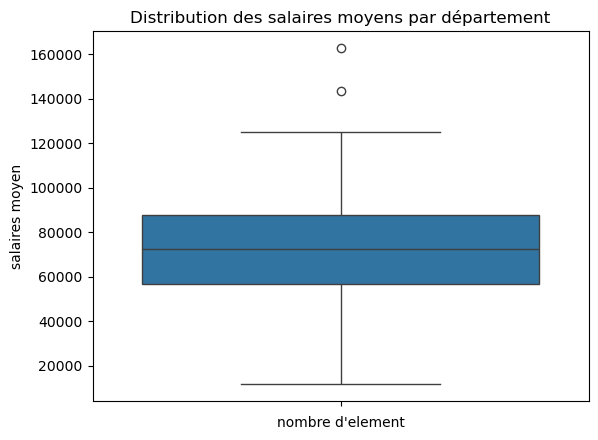

In [62]:
sns.boxplot(y=salaire_moyen_departement)
plt.title('Distribution des salaires moyens par département')
plt.xlabel('nombre d\'element')
plt.ylabel('salaires moyen')
plt.show()

avoir les 5 departements avec les plus hauts salaires moyens et les 5 avec les plus bas salaires moyens 

In [64]:
# Départements avec les salaires moyens les plus bas
salaire_moyen_departement_5_smallest=salaire_moyen_departement.nsmallest(5)
print("Les 5 départements avec les salaires moyens les plus bas :\n", salaire_moyen_departement_5_smallest)

# Départements avec les salaires moyens les plus élevés
salaire_moyen_departement_5_largest=salaire_moyen_departement.nlargest(5)
print("\n\n Les 5 départements avec les salaires moyens les plus élevés :\n", salaire_moyen_departement_5_largest)

Les 5 départements avec les salaires moyens les plus bas :
 Department
GEN General City / Unallocated    11749.700372
REG Elections                     13362.255129
Registrar                         13382.462151
HHP CleanPowerSF                  21007.795385
HOM HOMELESSNESS SERVICES         25553.754074
Name: Salaries, dtype: float64


 Les 5 départements avec les salaires moyens les plus élevés :
 Department
Law Library          162770.802500
City Attorney        143365.991923
LLB Law Library      125025.977222
Public Defender      120759.484658
CAT City Attorney    120524.915185
Name: Salaries, dtype: float64


<strong>representations graphiques de la distribution des salaires moyens par departement</strong>

Text(0, 0.5, 'Salaire Moyen')

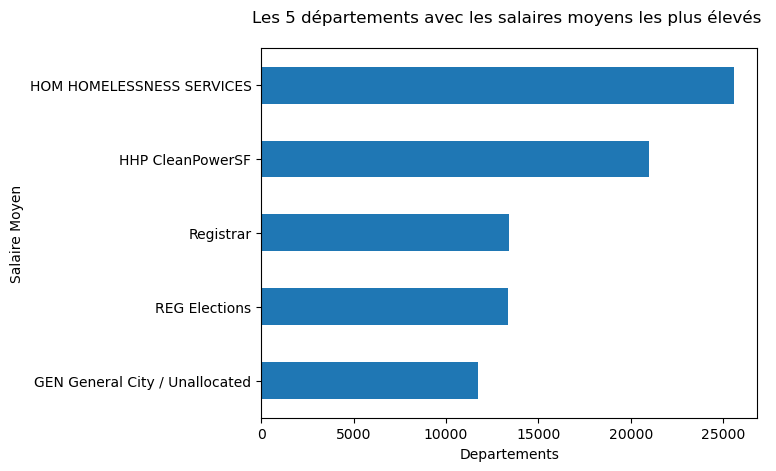

In [66]:
salaire_moyen_departement_5_smallest.plot(kind='barh')
plt.title('Les 5 départements avec les salaires moyens les plus élevés \n ')
plt.xlabel('Departements')
plt.ylabel('Salaire Moyen')

Text(0, 0.5, 'Salaire Moyen')

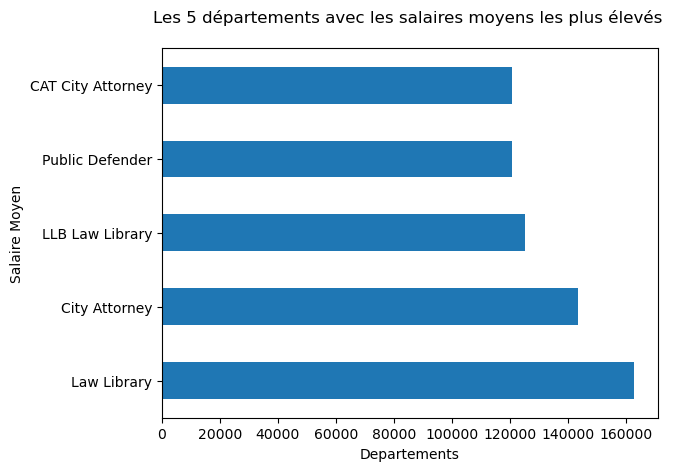

In [67]:
salaire_moyen_departement_5_largest.plot(kind='barh')
plt.title('Les 5 départements avec les salaires moyens les plus élevés \n ')
plt.xlabel('Departements')
plt.ylabel('Salaire Moyen')

<h5>analyse de la distribution des salaires au seins des departements</h5>

Index(['Law Library', 'City Attorney', 'LLB Law Library', 'Public Defender',
       'CAT City Attorney'],
      dtype='object', name='Department')


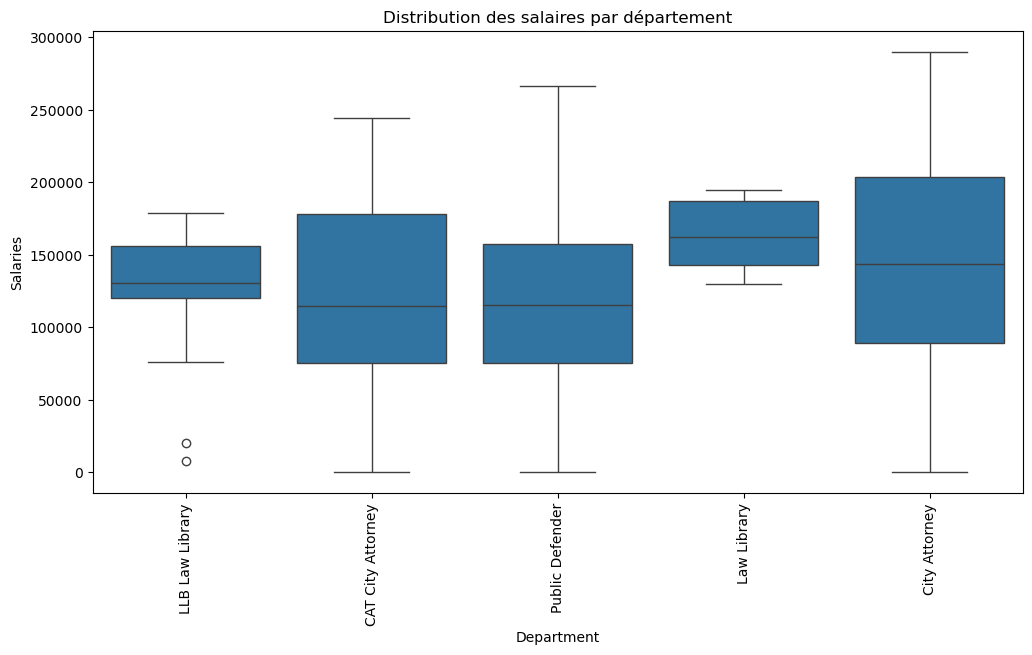

In [69]:
top_5_departement = salaire_moyen_departement_5_largest.index
print(top_5_departement)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='Salaries', data= df[df['Department'].isin(top_5_departement)])
plt.xticks(rotation=90)  # Faire pivoter les labels des départements si besoin
plt.title('Distribution des salaires par département')
plt.show()

<strong>analyse des ecart-type au seins des departement</strong>

ecart-types au seins des 5 departements avec les plus hauts salaires moyens 


In [72]:
# dictionnaire vide pour stocker les ecartype au sein de chaque departement
ecart_type_departement = {}


for departement in salaire_moyen_departement_5_largest.index :
    # Filtrer le DataFrame pour le département spécifique et calculer l'écart-type des salaires
    ecart_type_departement[departement]=np.std(df[df['Department'] == departement] ['Salaries'])

ecart_type_departement

{'Law Library': 25102.837775393917,
 'City Attorney': 64574.71589292186,
 'LLB Law Library': 48375.18346414993,
 'Public Defender': 60067.0745397277,
 'CAT City Attorney': 58450.06041483502}

ecart-types au seins des 5 departements les plus bas salaires moyens

In [74]:
# dictionnaire vide pour stocker les ecartype au sein de chaque departement
ecart_type_departement = {}


for departement in salaire_moyen_departement_5_smallest.index :
    # Filtrer le DataFrame pour le département spécifique et calculer l'écart-type des salaires
    ecart_type_departement[departement]=np.std(df[df['Department'] == departement] ['Salaries'])

ecart_type_departement

{'GEN General City / Unallocated': 13660.274977292496,
 'REG Elections': 23966.470799600273,
 'Registrar': 25784.75273000683,
 'HHP CleanPowerSF': 15804.42380816626,
 'HOM HOMELESSNESS SERVICES': 12696.479795505515}

du au tres grand nombre de donnees nous utiliserons un echantillions pour nos calculs statistiques de sorte a bien representer chaque departement 

In [76]:
df_echantillon_department=df.groupby("Department").sample(frac=0.01, random_state=1)
df_echantillon_department['Department'].describe()

count              6659
unique              104
top       Public Health
freq                753
Name: Department, dtype: object

<strong>Hypothèse à tester :</strong>
<ul>
        <li>h0 :"Les salaires ne diffèrent pas significativement entre les départements</li>
        <li>h1 :"Il y a une différence significative des salaires entre les départements</li>
</ul>

In [78]:
from scipy import stats

# creations des groupes pour 
groups = [df_echantillon_department[df_echantillon_department['Department'] == year]['Salaries'] for year in df_echantillon_department['Department'].unique()]

stat, p = stats.kruskal(*groups)

print(f"Statistique de Kruskal-Wallis : {stat:.4f}, p-value : {p:.500f} \n")

if p < 0.05:
    print("Il y a une différence significative des salaires entre les départements.")
else:
    print("Les salaires ne diffèrent pas significativement entre les départements.")

Statistique de Kruskal-Wallis : 1438.8465, p-value : 0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000340353592344616673183802992838537077523629869509531469684506583168124624344466761012452789184692292958157170447239636912452337152363786300721764409260229660537992404249155855687428507849983015838875138131872228996063225647147123339022406791496582772195229951718770503 

Il y a une différence significative des salaires entre les départements.


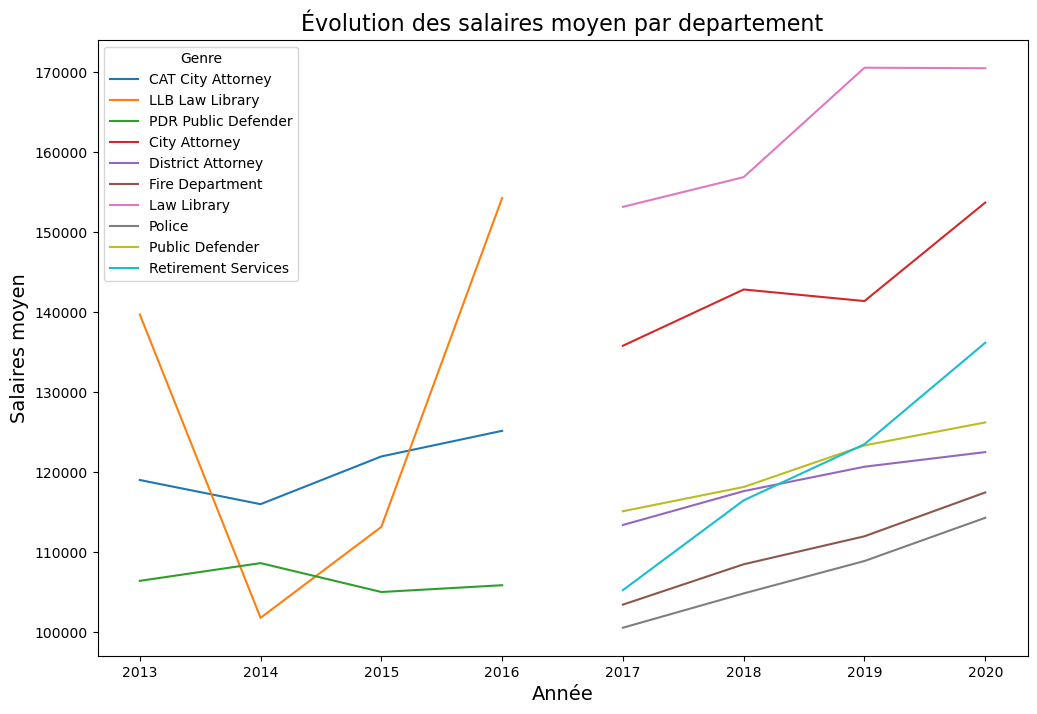

In [79]:
departement_par_annee = df.groupby(['Year','Department'])['Salaries'].mean().reset_index()

plt.figure(figsize=(12,8))
sns.lineplot(departement_par_annee[departement_par_annee['Department'].isin(salaire_moyen_departement.nlargest(10).index)], x='Year', y='Salaries', hue='Department')
plt.title('Évolution des salaires moyen par departement', fontsize=16)
plt.xlabel('Année', fontsize=14)
plt.ylabel('Salaires moyen', fontsize=14)

# Afficher la légende et le graphique
plt.legend(title='Genre')
plt.show()

<h4>distribution des salaire par familles de métiers</h4>

In [81]:
print(df['Job Family'].value_counts())
print('\n taille : ',len(df['Job Family'].value_counts()))

Job Family
Nursing                           69378
Street Transit                    54906
Police Services                   41099
Journeyman Trade                  38870
Human Services                    34536
Public Service Aide               30292
Clerical, Secretarial & Steno     29181
Fire Services                     27497
Housekeeping & Laundry            21874
Management                        20563
Budget, Admn & Stats Analysis     20072
Protection & Apprehension         19454
Professional Engineering          19453
Recreation                        19445
Correction & Detention            17623
Information Systems               16653
Legal & Court                     15035
Med Therapy & Auxiliary           13815
Payroll, Billing & Accounting     13359
Library                           12324
Lab, Pharmacy & Med Techs         11536
Personnel                          9816
Semi-Skilled & General Labor       8628
Sub-Professional Engineering       8337
Agriculture & Horticulture   

In [82]:
salaire_moyen_familly = df.groupby('Job Family')['Salaries'].mean()
salaire_moyen_familly

Job Family
Administrative & Mgmt (Unrep)     249025.933548
Administrative Secretarial         77188.517541
Administrative-DPW/PUC            129432.945124
Administrative-Labor & Trades     112740.192120
Agriculture & Horticulture         59384.492374
Airport Operation                  72897.357276
Appraisal & Taxation               73257.691777
Budget, Admn & Stats Analysis      77574.007335
Clerical, Secretarial & Steno      45630.305910
Community Development              76928.137783
Computer Operatns & Repro Svcs     45556.155680
Construction Inspection            88167.416780
Construction Project Mgmt         130322.460257
Correction & Detention             85309.908705
Dietary & Food                     39102.412791
Emergency Coordination             93629.753413
Emergency Services                 63897.696622
Energy & Environment               86776.749600
Fire Services                     107963.930329
Health & Sanitation Inspection     98580.473472
Hospital Administration      

In [83]:
# ecartype des salaire par famille
np.std(salaire_moyen_familly)

35999.02273772645

In [84]:
# top 5 avec le plus haut salaire moyen
salaire_moyen_familly_5_largest= salaire_moyen_familly.nlargest(5)
print('\nsalaire_moyen_familly_5_largest : ',salaire_moyen_familly_5_largest)

# top 5 avec le plus bas salaire moyen
salaire_moyen_familly_5_smallest= salaire_moyen_familly.nsmallest(5)
print('\nsalaire_moyen_familly_5_smallest : ',salaire_moyen_familly_5_smallest)


salaire_moyen_familly_5_largest :  Job Family
Administrative & Mgmt (Unrep)    249025.933548
Unassigned                       152949.373905
Construction Project Mgmt        130322.460257
Administrative-DPW/PUC           129432.945124
Management                       125235.187024
Name: Salaries, dtype: float64

salaire_moyen_familly_5_smallest :  Job Family
Public Service Aide             10271.150421
Recreation                      12496.287616
Sub-Professional Engineering    33438.956602
Park & Zoo                      37072.227798
Dietary & Food                  39102.412791
Name: Salaries, dtype: float64


<Axes: ylabel='Job Family'>

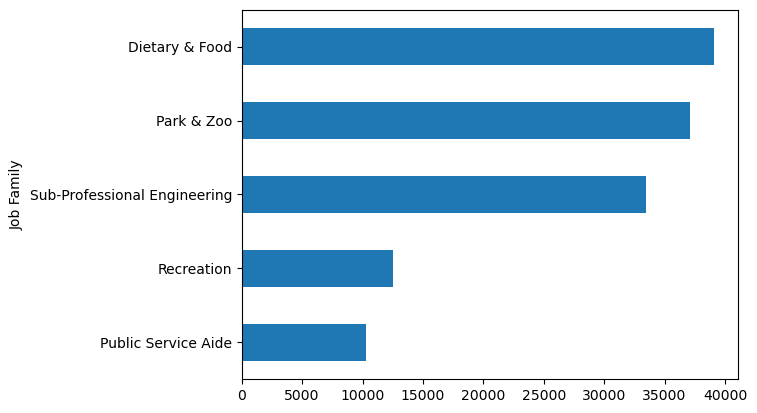

In [85]:
salaire_moyen_familly_5_smallest.plot(kind='barh')

<Axes: ylabel='Job Family'>

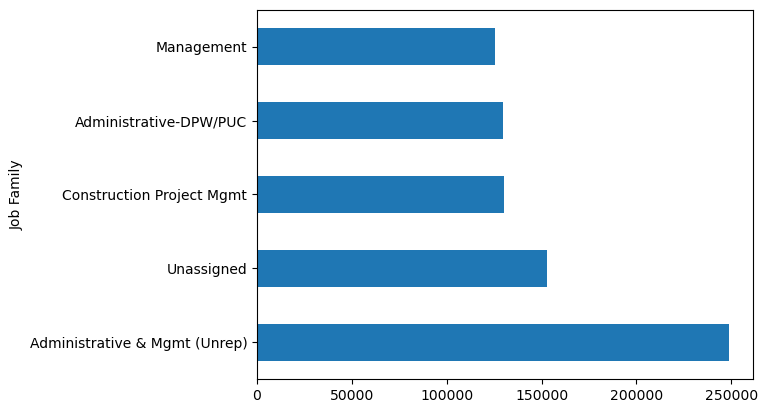

In [86]:
salaire_moyen_familly_5_largest.plot(kind='barh')

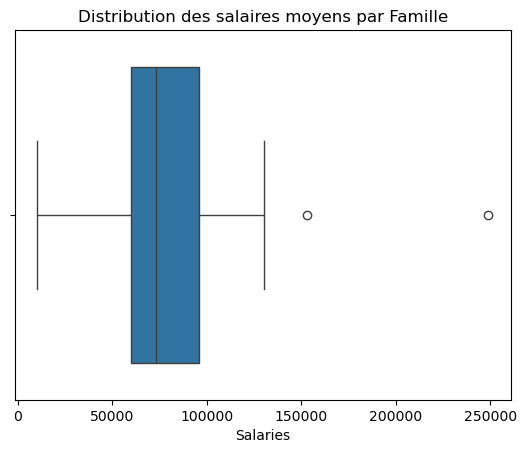

In [87]:
sns.boxplot(x=salaire_moyen_familly)
plt.title('Distribution des salaires moyens par Famille')
plt.show()

<h5>distribution des sallaires au seins des familles</h5>

<Axes: xlabel='Job Family', ylabel='Salaries'>

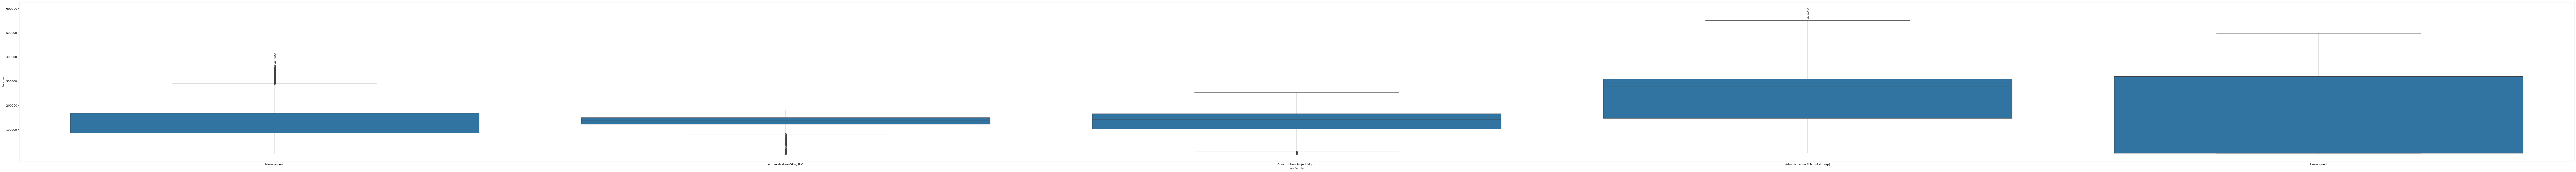

In [89]:
top_5_familly=salaire_moyen_familly_5_largest.index

plt.figure(figsize=(160,10))
sns.boxplot(x='Job Family',y='Salaries',data=df[df['Job Family'].isin(top_5_familly)])

ana;yse des ecartypes au seins des famille

In [91]:
# dictionnaire vide pour stocker les ecartype au sein de chaque departement
ecart_type_familly = {}


for familly in salaire_moyen_familly_5_largest.index :
    # Filtrer le DataFrame pour le département spécifique et calculer l'écart-type des salaires
    ecart_type_familly[familly]=np.std(df[df['Job Family'] == familly] ['Salaries'])

ecart_type_familly

{'Administrative & Mgmt (Unrep)': 137473.75549914566,
 'Unassigned': 181523.53518016075,
 'Construction Project Mgmt': 53482.22378717718,
 'Administrative-DPW/PUC': 35084.05717624829,
 'Management': 66516.75812307987}

In [92]:
# dictionnaire vide pour stocker les ecartype au sein de chaque departement
ecart_type_familly = {}


for familly in salaire_moyen_familly_5_smallest.index :
    # Filtrer le DataFrame pour le département spécifique et calculer l'écart-type des salaires
    ecart_type_familly[familly]=np.std(df[df['Job Family'] == familly] ['Salaries'])

ecart_type_familly

{'Public Service Aide': 10803.035002095623,
 'Recreation': 18044.080271149145,
 'Sub-Professional Engineering': 32850.0506276904,
 'Park & Zoo': 25452.0999014311,
 'Dietary & Food': 23447.654522533052}

In [93]:
df_echantillon_family=df.groupby("Job Family").sample(frac=0.01, random_state=1)
df_echantillon_family.describe()

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,6661.000000,6661.000000,6661.000000,6.661000e+03,6661.000000,6661.000000,6661.000000,6661.000000,6661.000000,6661.000000,6661.000000,6661.000000,6661.000000
mean,2.970875,2016.558775,494.285843,2.006647e+07,72068.353109,5756.989562,3876.674322,81500.605046,14292.112235,10269.363261,5224.042773,29785.518269,111286.123315
std,1.578209,2.255731,329.499070,1.969930e+07,47833.877417,13631.466540,8909.030749,56165.714221,10431.878854,5808.324951,3843.456588,18154.222916,72887.111216
min,1.000000,2013.000000,1.000000,6.000000e+00,1.690000,0.000000,0.000000,1.780000,0.000000,0.000000,0.000000,0.000000,1.920000
25%,2.000000,2015.000000,250.000000,2.894500e+04,32844.130000,0.000000,0.000000,36396.350000,5583.440000,5124.700000,2070.430000,13357.410000,49684.400000
50%,2.000000,2017.000000,535.000000,3.667384e+07,69813.230000,0.000000,743.930000,77269.000000,14336.520000,12544.630000,5037.680000,33295.390000,110533.970000
75%,4.000000,2018.000000,790.000000,3.767680e+07,104208.930000,4755.030000,4503.030000,116033.350000,20893.210000,14487.080000,7722.330000,41869.360000,158713.570000
max,7.000000,2020.000000,965.000000,4.568627e+07,308632.510000,287498.180000,354948.000000,458528.750000,115149.420000,32660.490000,35157.630000,139457.700000,543635.200000


<strong>Test de kruskal pour verifier si il ya vraiement un ecart entre les salaire par famille</strong>

<strong>Hypothèse à tester :</strong>
<ul>
        <li>h0 :"Les salaires ne diffèrent pas significativement entre les famille de travail</li>
        <li>h1 :"Il y a une différence significative des salaires entre les famille de travail</li>
</ul>

In [95]:
from scipy import stats

# creations des groupes pour 
groups = [df_echantillon_family[df_echantillon_family['Job Family'] == year]['Salaries'] for year in df_echantillon_family['Job Family'].unique()]

stat, p = stats.kruskal(*groups)

print(f"Statistique de Kruskal-Wallis : {stat:.4f}, p-value : {p:.50f} \n")

if p < 0.05:
    print("Il y a une différence significative des salaires entre les famille de travail.")
else:
    print("Les salaires ne diffèrent pas significativement entre les famille de travail.")

Statistique de Kruskal-Wallis : 2393.4259, p-value : 0.00000000000000000000000000000000000000000000000000 

Il y a une différence significative des salaires entre les famille de travail.


<h2>3 - Analyse des salaires lies aux Heures Supplémentaires</h2>

<p>Intégration d’une analyse plus fine des anomalies et de l’impact des heures supp.</p>


In [97]:
df['Overtime'].describe()

count    665919.000000
mean       5694.637211
std       13428.230079
min           0.000000
25%           0.000000
50%           0.000000
75%        4633.820000
max      321523.310000
Name: Overtime, dtype: float64

<h3>a - Comparaison des overtime entre départements ou métiers</h3>

<h4>Anlayse entre départements</h4>

In [100]:
df_overtime_par_departement = df.groupby('Department')['Overtime'].mean().reset_index()

df_overtime_par_departement_10_largest = df_overtime_par_departement.nlargest(10,'Overtime')
print('df_overtime par departement 10 largest \n',df_overtime_par_departement_10_largest)

# nous exlurons les departement dont le revenu overtime ets egale a 0
df_overtime_par_departement_10_smallest = df_overtime_par_departement[df_overtime_par_departement['Overtime']>0].nsmallest(10,'Overtime') 
print('\n\n df_overtime par departement 10 smallest \n',df_overtime_par_departement_10_smallest)


df_overtime par departement 10 largest 
                         Department      Overtime
100                        Sheriff  28986.818566
55             FIR Fire Department  25333.021143
57                 Fire Department  20278.104338
84                          Police  18372.313038
44    Dept of Emergency Management  16411.243616
51   Emergency Communications Dept  15473.652375
99                     SHF Sheriff  13808.885895
79   Municipal Transportation Agcy  12674.594792
81                      POL Police  10395.475533
76   MTA Municipal Transprtn Agncy   9310.555809


 df_overtime par departement 10 smallest 
                         Department  Overtime
43            Dept Status of Women  0.000325
96          Rent Arbitration Board  0.102378
50  Economic Workforce Development  0.137209
10                  Art Commission  0.290588
24               CPC City Planning  0.361152
69         Human Rights Commission  0.398805
33        Civil Service Commission  1.386250
27      CSS Chi

<strong>visualisation des overtimes pour ces departement</strong>

Text(0.5, 1.0, 'repartition des overtimes pour les 10 departement avec le plus grand overtime moyen \n')

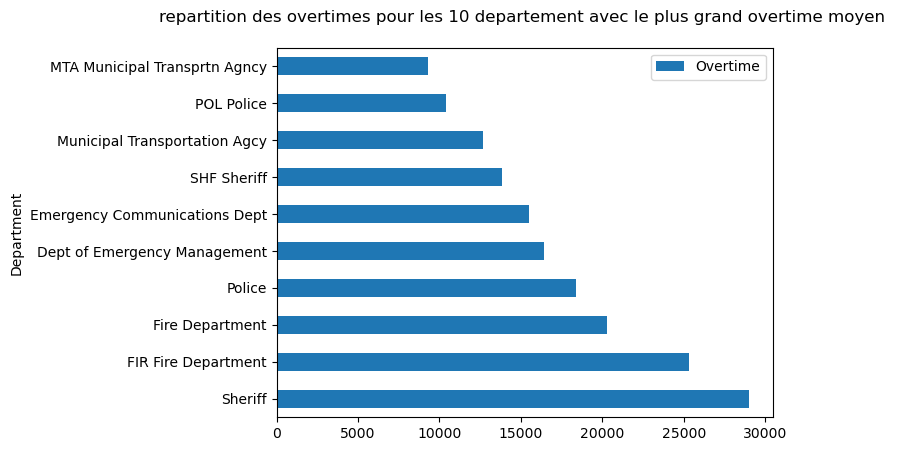

In [102]:
df_overtime_par_departement_10_largest.plot(kind='barh',x='Department',y='Overtime')
plt.title('repartition des overtimes pour les 10 departement avec le plus grand overtime moyen \n')

Text(0.5, 1.0, 'repartition des overtimes pour les 10 departement avec le plus bas overtime moyen \n')

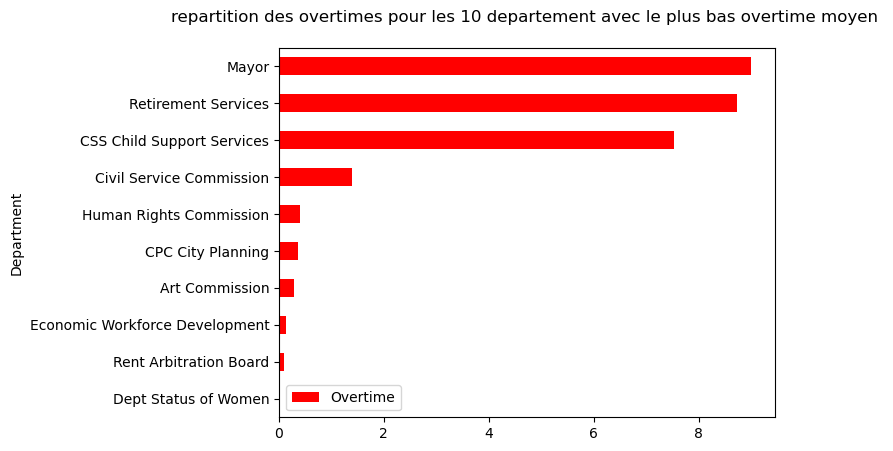

In [103]:
df_overtime_par_departement_10_smallest.plot(kind='barh',x='Department',y='Overtime',color='Red')
plt.title('repartition des overtimes pour les 10 departement avec le plus bas overtime moyen \n')

<strong>Les cinq départements avec le plus d'heures supplémentaires</strong>
<ol>
 <li> Sheriff</li>
 <li> Fire Department</li>
 <li> Police</li>
 <li> Dept of Emergency Management</li>
</ol>
Cela semble logique, car ces services nécessitent souvent du personnel en disponibilité permanente, avec des horaires étendus (interventions nocturnes, week-ends, etc.)
</br>
</br>
<strong>Les cinq départements avec le moins d'heures supplémentaires</strong>
<ol>
    <li>Dept Status of Women </li>
    <li>Rent Arbitration Board </li>
    <li>Economic Workforce Development </li>
    <li>Art Commission </li>
    <li>City Planning </li> 
</ol>
Ces départements ont probablement des horaires plus standards, avec moins de nécessité de travailler au-delà des 40 heures par semaine

Text(0.5, 1.0, '\n Distribution des overtime pour les 5 departemnts avec le haut taux moyen \n ')

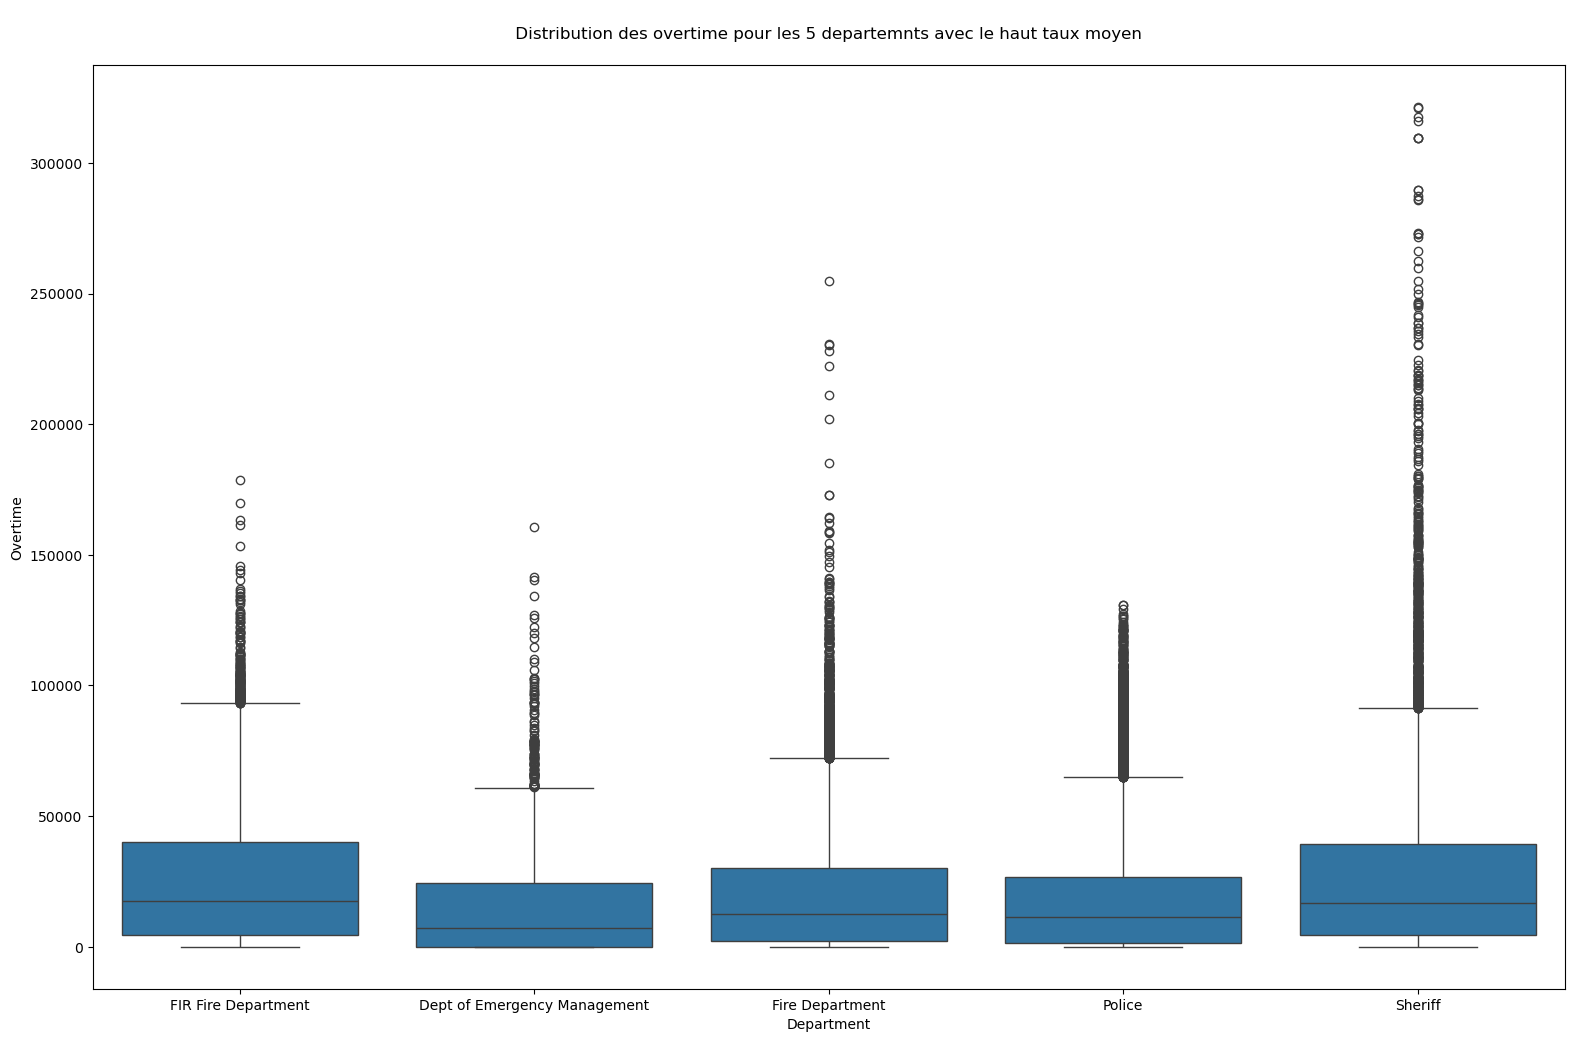

In [105]:
df_overtime_par_departement_5_largest = df_overtime_par_departement.nlargest(5,'Overtime')

plt.figure(figsize=(19,12))
sns.boxplot(x='Department',y='Overtime',data=df[df['Department'].isin(df_overtime_par_departement_5_largest['Department'])])
plt.title('\n Distribution des overtime pour les 5 departemnts avec le haut taux moyen \n ')

Tous les départements ont une large distribution des heures supplémentaires, avec des valeurs aberrantes significatives.
Le département du Sheriff semble avoir les valeurs les plus élevées en termes d’heures supplémentaires.

La présence d’autant de valeurs aberrantes pourrait indiquer une mauvaise gestion des heures supplémentaires ou des besoins élevés en personnel.

In [107]:
#selectionner les colonnes overtimes et salaire pour faire la comparaison (on prend les overtime >0)
df_overtime_vs_salarie = df[df['Overtime']>0] [['Overtime','Salaries']]

df_overtime_vs_salarie['overtime_salaries'] = df_overtime_vs_salarie['Overtime'] / df_overtime_vs_salarie['Salaries']
df_overtime_vs_salarie

,Overtime,Salaries,overtime_salaries
230,557.16,95531.57,0.005832
231,609.51,81147.38,0.007511
232,1241.66,95531.55,0.012997
253,317.81,76269.60,0.004167
257,52.97,76269.63,0.000695
...,...,...,...
678512,505.88,54954.97,0.009205
678515,1668.76,89518.56,0.018641
678516,1707.72,103094.46,0.016565
678518,303.60,105738.31,0.002871


In [108]:
df_overtime_vs_salarie['overtime_salaries'].describe()

count    3.153170e+05
mean     1.506687e-01
std      2.954027e-01
min      5.155303e-08
25%      2.413458e-02
50%      8.019490e-02
75%      2.035927e-01
max      5.434952e+01
Name: overtime_salaries, dtype: float64

In [109]:
df[(df["Overtime"] > df["Salaries"])]

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation,Salaries bins
1664,1,H000,H002,Calendar,2013,Public Protection,FIR,FIR Fire Department,798.0,"Firefighters - Miscellaneous, Local 798",...,109390.44,136843.65,20188.91,266423.00,23658.50,14767.53,4515.07,42941.10,309364.10,tres élevé
1719,1,H000,H002,Calendar,2013,Public Protection,FIR,FIR Fire Department,798.0,"Firefighters - Miscellaneous, Local 798",...,115893.47,126145.47,20651.14,262690.08,24724.99,15645.43,4412.29,44782.71,307472.79,tres élevé
1933,1,H000,H002,Calendar,2013,Public Protection,FIR,FIR Fire Department,798.0,"Firefighters - Miscellaneous, Local 798",...,115893.44,122732.77,19342.14,257968.35,24813.96,15645.43,4383.46,44842.85,302811.20,tres élevé
1945,1,H000,H002,Calendar,2013,Public Protection,FIR,FIR Fire Department,798.0,"Firefighters - Miscellaneous, Local 798",...,115893.46,116110.34,19898.46,251902.26,24651.29,15645.43,4211.90,44508.62,296410.88,tres élevé
2704,1,H000,H020,Calendar,2013,Public Protection,FIR,FIR Fire Department,798.0,"Firefighters - Miscellaneous, Local 798",...,135903.02,163477.81,20994.96,320375.79,29487.30,15788.97,5392.94,50669.21,371045.00,tres élevé
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677338,6,1400,1402,Fiscal,2020,General Administration & Finance,REG,Registrar,790.0,"SEIU, Local 1021, Misc",...,744.33,754.54,0.00,1498.87,0.00,0.00,116.33,116.33,1615.20,faible
677386,6,1400,1402,Fiscal,2020,General Administration & Finance,REG,Registrar,790.0,"SEIU, Local 1021, Misc",...,182.00,344.66,0.00,526.66,0.00,0.00,40.87,40.87,567.53,faible
677389,6,1400,1402,Fiscal,2020,General Administration & Finance,REG,Registrar,790.0,"SEIU, Local 1021, Misc",...,1097.85,1262.87,0.00,2360.72,0.00,0.00,183.22,183.22,2543.94,faible
677426,6,1400,1402,Fiscal,2020,General Administration & Finance,REG,Registrar,790.0,"SEIU, Local 1021, Misc",...,182.00,358.31,0.00,540.31,0.00,0.00,41.94,41.94,582.25,faible


In [110]:
nb_personnes_plus_overtime = (df_overtime_vs_salarie["Overtime"] > df_overtime_vs_salarie["Salaries"]).sum()
print(f"Nombre de personnes dont les heures supplémentaires dépassent leur salaire : {nb_personnes_plus_overtime}")


Nombre de personnes dont les heures supplémentaires dépassent leur salaire : 1564


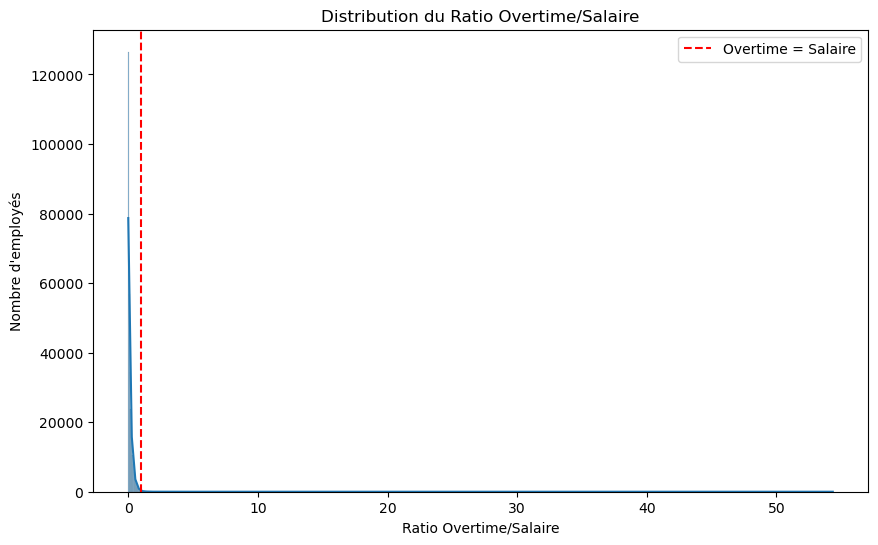

In [111]:
plt.figure(figsize=(10,6))
sns.histplot(df_overtime_vs_salarie["overtime_salaries"], bins=1000, kde=True)
plt.axvline(x=1, color='red', linestyle='--', label="Overtime = Salaire")
plt.title("Distribution du Ratio Overtime/Salaire")
plt.xlabel("Ratio Overtime/Salaire")
plt.ylabel("Nombre d'employés")
plt.legend()
plt.show()

In [112]:
df_overtime_vs_salarie['overtime_salaries'].describe()

count    3.153170e+05
mean     1.506687e-01
std      2.954027e-01
min      5.155303e-08
25%      2.413458e-02
50%      8.019490e-02
75%      2.035927e-01
max      5.434952e+01
Name: overtime_salaries, dtype: float64

<strong>Observations :</strong>
<ul> 
    <li>La majorité des employés perçoivent des salaires d'heures supplémentaires relativement faibles, avec une médiane autour de 8% du salaire de base.</li>
    <li>La moyenne est d'environ 15%, ce qui suggère que, dans l'ensemble, les heures supplémentaires représentent une proportion modérée du salaire des employés.</li> 
    <li>Il existe une grande variabilité dans les données, comme en témoigne l'écart-type élevé (0.2954), ce qui indique que certains employés reçoivent des heures supplémentaires proportionnellement bien plus élevées que d'autres.</li> 
    <li>Les valeurs extrêmes, comme celles proches de 54 (par exemple, un ratio de 54.35), peuvent être dues à des employés avec des salaires de base très faibles, compensés par un grand nombre d'heures supplémentaires.</li>
    <li>Les cas proches de zéro pour `overtime_salaries` pourraient indiquer des employés avec peu ou pas d'heures supplémentaires, ou bien des anomalies dans les données.</li>
</ul>

<strong>Hypothèses possibles :</strong>

<ul>
    <li>Les très grands ratios (ex: 54, 42, 28...) pourraient être des employés à très bas salaire fixe, compensé par de nombreuses heures supplémentaires.</li>
    <li>Les ratios entre 3 et 5 pourraient être des employés réguliers mais avec une forte charge de travail en overtime.</li>
    <li>Cela peut aussi indiquer des politiques salariales inhabituelles, comme un manque de personnel obligeant à recourir aux heures supplémentaires massivement.</li>
</ul>

<h2>4 - Segmentation des Employés (Clustering). </h2>

L’objectif est de regrouper les employés en fonction de leurs salaires et avantages pour identifier des profils types.

<h3> Sélection des variables</h3>

<strong> selection des  variables pertinentes et standardisation </strong>

In [118]:
from sklearn.preprocessing import StandardScaler

# Sélectionner les variables pertinentes
features = ['Salaries', 'Overtime', 'Total Benefits', 'Other Salaries']
df_selected = df[features].copy()

# Appliquer la standardisation
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Convertir en DataFrame pour visualisation
df_scaled = pd.DataFrame(df_scaled, columns=features)

# Vérifier les nouvelles statistiques après standardisation
print(df_scaled.describe())

           Salaries      Overtime  Total Benefits  Other Salaries
count  6.659190e+05  6.659190e+05    6.659190e+05    6.659190e+05
mean  -1.931716e-16  3.312001e-17    2.997873e-16   -2.202310e-16
std    1.000001e+00  1.000001e+00    1.000001e+00    1.000001e+00
min   -1.508621e+00 -4.240798e-01   -1.661467e+00   -4.562084e-01
25%   -7.962948e-01 -4.240798e-01   -8.696486e-01   -4.562084e-01
50%   -4.207536e-02 -4.240798e-01    2.000007e-01   -3.683078e-01
75%    6.464067e-01 -7.899909e-02    6.643593e-01    6.861290e-02
max    1.216649e+01  2.351977e+01    7.591577e+00    6.681556e+01


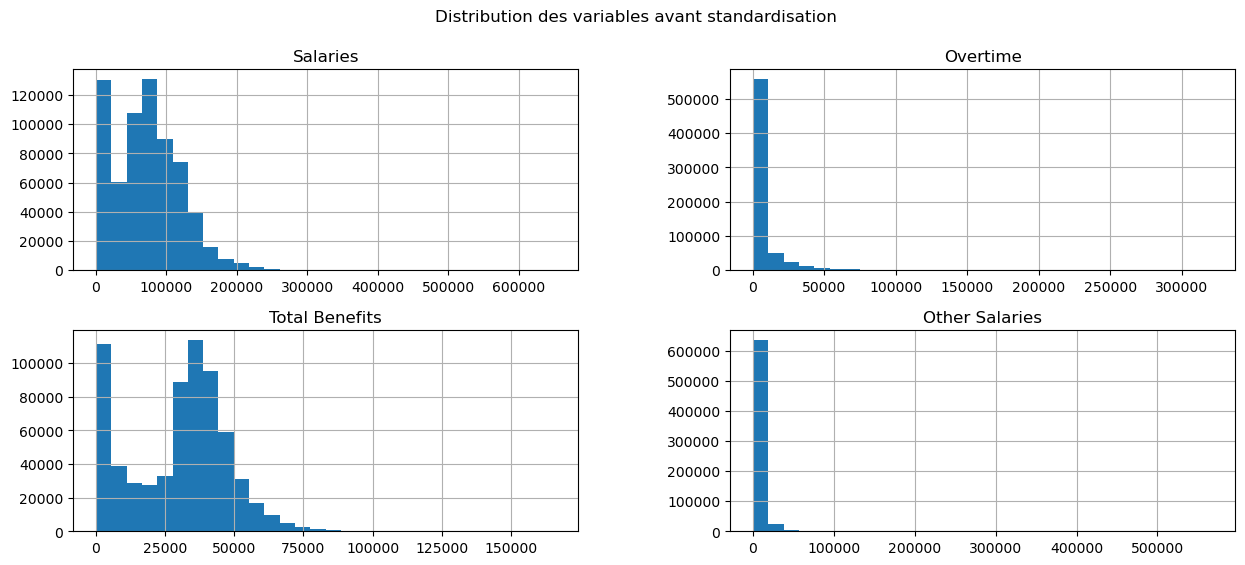

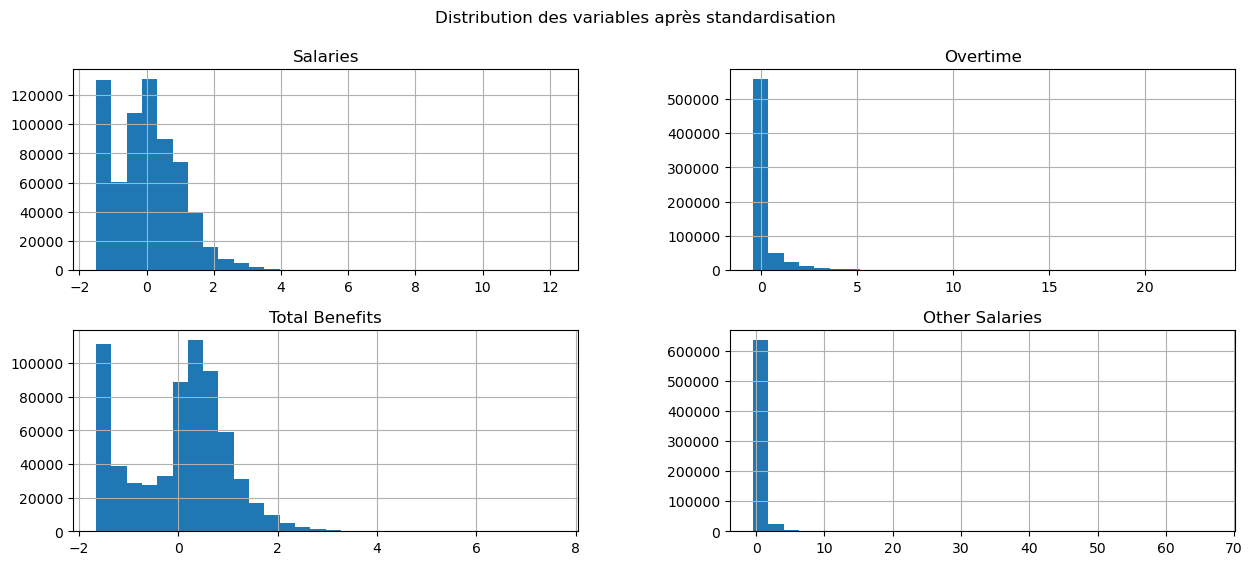

In [119]:
# Avant standardisation
df_selected.hist(figsize=(15, 6), bins=30)
plt.suptitle("Distribution des variables avant standardisation")
plt.show()

# Après standardisation
df_scaled.hist(figsize=(15, 6), bins=30)
plt.suptitle("Distribution des variables après standardisation")
plt.show()


<h3>Application d’un algorithme de clustering : K-Means</h3>

<h4><strong>la methode de coude : </strong></h4>
<p> : pour determiner le nombre de cluster ideal pour notre model</p>

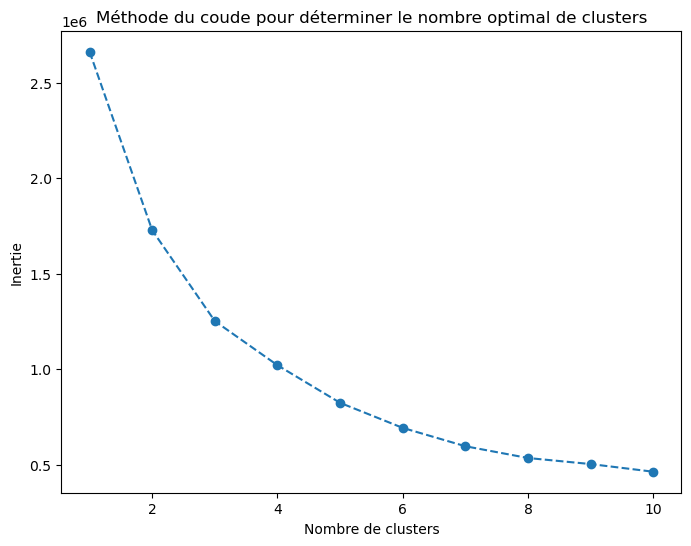

In [122]:
from sklearn.cluster import KMeans

# Appliquer K-Means pour différents nombres de clusters
inertia = []  # Liste pour stocker l'inertie
for k in range(1, 11):  # Tester de 1 à 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)  # Appliquer K-Means sur les données standardisées
    inertia.append(kmeans.inertia_)  # Enregistrer l'inertie

# Tracer l'inertie pour chaque k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

In [123]:
inertia

[2663675.999999993,
 1727826.6153804031,
 1251856.5876996738,
 1020539.655440471,
 823546.2796255897,
 692251.4473622404,
 596041.3426474237,
 534333.866327499,
 502640.0060274994,
 462458.6539180624]

<strong>Analyse du Graphique :</strong>
<p>En examinant l'inertie pour chaque valeur de k, on peut observer que la diminution de l'inertie ralentit à mesure que le nombre de clusters augmente. Voici quelques points d'interprétation :</p>

<ul>
    <li>Entre k=1 et k=3, l'inertie diminue de manière significative. Cela montre que les premiers clusters sont importants pour expliquer la variance des données.</li>
    <li>À partir de k=4, la réduction de l'inertie devient moins prononcée. Cela suggère que l'ajout de clusters supplémentaires n'apporte pas autant de gains en termes de séparation des données.</li>
</ul>
Donc, k=4 semble être un bon choix pour le nombre optimal de clusters, car l'inertie ne diminue plus autant après ce point. Tu peux essayer ce nombre de clusters et voir si les groupes obtenus sont interprétables et significatifs.

In [125]:
# Appliquer K-Means avec k=4
kmeans = KMeans(n_clusters=4, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)  # Ajouter les labels de clusters à notre DataFrame

Segmentation des employés par cluster selon l'overtime et le salaires

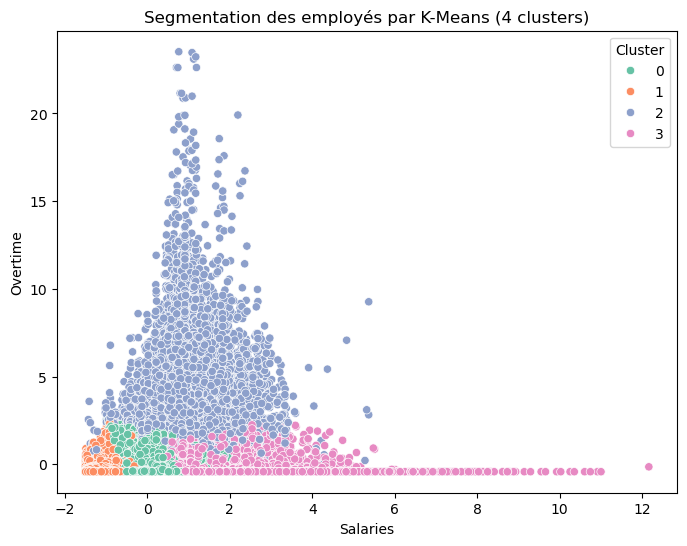

In [127]:
# Visualisation des résultats du clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled['Salaries'], y=df_scaled['Overtime'], hue=df_scaled['Cluster'], palette='Set2')
plt.title('Segmentation des employés par K-Means (4 clusters)')
plt.xlabel('Salaries')
plt.ylabel('Overtime')
plt.legend(title='Cluster')
plt.show()

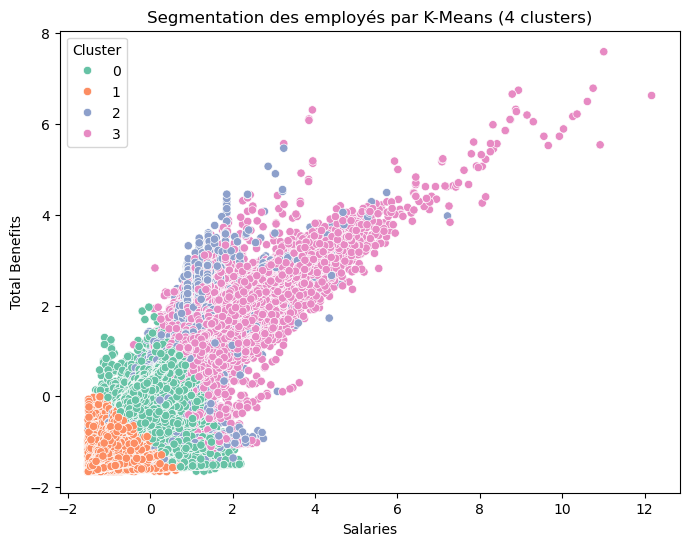

In [128]:
# Visualisation des résultats du clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled['Salaries'], y=df_scaled['Total Benefits'], hue=df_scaled['Cluster'], palette='Set2')
plt.title('Segmentation des employés par K-Means (4 clusters)')
plt.xlabel('Salaries')
plt.ylabel('Total Benefits')
plt.legend(title='Cluster')
plt.show()

<h3>Analyse des groupes obtenus</h3>

regrouper les donnees selon les cluster obtenus pour une analyse

In [131]:
# Calcul des moyennes des variables par cluster
cluster_summary = df_scaled.groupby('Cluster')[['Salaries', 'Overtime', 'Other Salaries', 'Total Benefits']].mean()

# Afficher le résumé des clusters
cluster_summary

,Salaries,Overtime,Other Salaries,Total Benefits
Cluster,,,,
0,0.046110,-0.135301,-0.168940,0.223063
1,-1.153534,-0.387190,-0.323189,-1.307843
2,0.781902,2.753354,1.525865,0.789686
3,1.395678,-0.149409,0.318183,1.203044


<strong>Interprétation des Clusters :</strong>

<ul>
  <li><strong>Cluster 0 : "Employés standards"</strong>
    <ul>
      <li><strong>Profil</strong> : Fonctionnaires classiques avec un salaire moyen, peu d’heures supplémentaires et des avantages standards.</li>
      <li><strong>Exemples</strong> : Administratifs, techniciens, analystes.</li>
    </ul>
  </li>
  <li><strong>Cluster 1 : "Bas salaires"</strong>
    <ul>
      <li><strong>Profil</strong> : Employés à faible rémunération, peu ou pas d’heures supplémentaires et avantages limités.</li>
      <li><strong>Exemples</strong> : Agents de nettoyage, assistants, certains postes temporaires.</li>
    </ul>
  </li>
  <li><strong>Cluster 2 : "Heures sup & primes élevées"</strong>
    <ul>
      <li><strong>Profil</strong> : Salaires de base corrects, mais élevés grâce aux nombreuses heures supplémentaires et primes.</li>
      <li><strong>Exemples</strong> : Pompiers, policiers, personnel médical en astreinte.</li>
    </ul>
  </li>
  <li><strong>Cluster 3 : "Hauts revenus, peu d’heures sup"</strong>
    <ul>
      <li><strong>Profil</strong> : Cadres et hauts fonctionnaires avec des salaires et avantages élevés, mais peu d’heures supplémentaires.</li>
      <li><strong>Exemples</strong> : Directeurs, chefs de service, experts seniors.</li>
    </ul>
  </li>
</ul>



<h2>Conclusion de l'Analyse des Salaires</h2>

<h3>1. Analyse Temporelle des Salaires</h3>
<p>Les salaires ont montré des variations au fil des années, avec des hausses notables dans certaines périodes spécifiques. Un test de Kruskal-Wallis a révélé que les salaires diffèrent significativement d'une année à l'autre, indiquant des variations annuelles importantes.</p>

<h3>2. Comparaison entre Départements et Métiers</h3>
<p>Les départements tels que la Police et les Pompiers présentent des salaires plus élevés en raison des risques associés à leurs métiers, tandis que les départements administratifs ont des salaires plus bas. Les écarts salariaux au sein des différents métiers montrent que des groupes comme la sécurité bénéficient de primes et d’heures supplémentaires.</p>

<h3>3. Analyse des Heures Supplémentaires</h3>
<p>Les métiers dans la sécurité et la santé ont un plus grand volume d’heures supplémentaires. Certaines personnes gagnent même plus grâce aux heures supplémentaires que leur salaire de base.</p>

<h3>4. Segmentation des Employés (Clustering)</h3>
<p>Une segmentation des employés a été réalisée en utilisant la méthode du K-Means. Quatre clusters ont été identifiés :</p>
<ul>
    <li><strong>Cluster 0 : "Employés standards"</strong> – Employés avec des salaires moyens, peu d’heures supplémentaires et des avantages standards.</li>
    <li><strong>Cluster 1 : "Bas salaires"</strong> – Employés à faible rémunération, peu ou pas d’heures supplémentaires et avantages limités.</li>
    <li><strong>Cluster 2 : "Heures sup & primes élevées"</strong> – Employés avec des salaires corrects mais boostés par de nombreuses heures supplémentaires et primes.</li>
    <li><strong>Cluster 3 : "Hauts revenus, peu d’heures sup"</strong> – Cadres et hauts fonctionnaires avec des salaires et avantages élevés, mais peu d’heures supplémentaires.</li>
</ul>